Steps in Sentiment Analysis:
- Get sentiment score for each review comment 
- Create average sentiment score per restaurant
- List all nouns and adjectives for each comment
- Combine all list of nouns for each restaurant in separate list
- For restaurants with low sentiment score, combine all nouns in one list, and adjectives in another and show negative feedback word clouds each for nouns and adjectives
- Do the same for all positive scored restaurant and show positive feedback wordcloud
- Compare the avg sentiment score with the overall rating given
- Build a wordcloud to identify positive topics
- Build a wordcloid to identify negative topics

In [71]:
from matplotlib import pyplot as plt

In [72]:
import pandas as pd

**IMP**: use below code else long strings more than 50 characters are truncated

In [73]:
pd.set_option('display.max_colwidth', -1)

#### read the data

In [74]:
df_rest = pd.read_csv('toronto_restaurants.csv', header = None)

In [75]:
df_rest.columns = (['Name', 'Location', 'overall_rating', 'Num_Reviews', 'Cuisines', 'Rev_rating', 'Comment'])

In [76]:
#create an id column - will be used later while mapping the sentiment scores for each comment 
df_rest['row_id'] = df_rest.index

#### Part 1: Calculate sentiment score for each comment as a whole

In [77]:
df_rest.head(2)

,Name,Location,overall_rating,Num_Reviews,Cuisines,Rev_rating,Comment,row_id
0,Sunshine Spot,North York,3.6,42,"Casual Dining, Diner, Canadian",1,"Does not honor the online order advertised when you Google the place. Staff not friendly at all. Will not be coming back....,........ .........................",0
1,Sunshine Spot,North York,3.6,42,"Casual Dining, Diner, Canadian",Unknown,"2017/11/12\nWe’ve been meaning to try Sunshine Spot for a while. Those who know us will know why. 😀 Today we were in the area for a minor shopping excursion, and we stopped in just before 1 pm for lunch. The restaurant was mostly full, so we had to wait a couple of minutes for them to prepare a table. \n\nThe restaurant is long and narrow, made even narrower by the open kitchen halfway along one of the long walls. We were seated right across from the kitchen, where we had a direct view of the hustle and bustle. The expected commotion and noise was made worse by the table right behind me, where the four young men were having a loud, boisterous, profanity-laced conversation. They forgot",1


#### Add a new  column 'score' and convert to numeric

In [78]:
df_rest['Score'] = pd.Series()
df_rest['Score'] = pd.to_numeric(df_rest['Score'])

In [79]:
## convert overall_rating to numeric
df_rest['overall_rating'] = pd.to_numeric(df_rest['overall_rating'], errors = 'coerce')

#### Create function to get sentiment score of each sentence in the comment and take mean score for that comment

In [80]:
#import textblob and other packages
from textblob import TextBlob
import nltk
from statistics import mean

In [81]:
def get_comm_sentiment(comment):
    ''' take in a comment and return mean for all sentence sentiment score'''
    #create a blob of iput comment and empty list
    blob = TextBlob(str(comment))
    comment_scores = []
    
    #for each sentence in comment, append the sentiment polarity to the list
    for sentence in blob.sentences:
        comment_scores.append(sentence.sentiment.polarity)
    
    #calculate mean on the list for the whole comment
    return mean(comment_scores)

#### Get the score for each comment into the df

In [82]:
## For each comment in each row get the score for that comment from the function above and assign it to the score column

In [83]:
length = len(df_rest['row_id'])
#iterate through comments and assign score per comment in 'Score' column

for row_num in range(length):
    #calculate mean comment score from get_comm_sentiment() method
    row_comment = df_rest['Comment'][df_rest['row_id']==row_num]
    comm_score = get_comm_sentiment(row_comment)
    
    #assign to score column
    df_rest['Score'][df_rest['row_id']==row_num] = comm_score

C:\Users\bhrig\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [93]:
df_rest.head(2)

,Name,Location,overall_rating,Num_Reviews,Cuisines,Rev_rating,Comment,row_id,Score
0,Sunshine Spot,North York,3.6,42,"Casual Dining, Diner, Canadian",1,"Does not honor the online order advertised when you Google the place. Staff not friendly at all. Will not be coming back....,........ .........................",0,-0.062500
1,Sunshine Spot,North York,3.6,42,"Casual Dining, Diner, Canadian",Unknown,"2017/11/12\nWe’ve been meaning to try Sunshine Spot for a while. Those who know us will know why. 😀 Today we were in the area for a minor shopping excursion, and we stopped in just before 1 pm for lunch. The restaurant was mostly full, so we had to wait a couple of minutes for them to prepare a table. \n\nThe restaurant is long and narrow, made even narrower by the open kitchen halfway along one of the long walls. We were seated right across from the kitchen, where we had a direct view of the hustle and bustle. The expected commotion and noise was made worse by the table right behind me, where the four young men were having a loud, boisterous, profanity-laced conversation. They forgot",1,0.043601


#### Get average score per restaurant

In [64]:
rest_avg_scores = df_rest.groupby(['Name'], as_index=False).agg({'Score':mean})

In [65]:
rest_avg_scores.head(5) #check

,Name,Score
0,Affy's Premium Grill,0.042880
1,Akimi Japanese Cuisine,0.145891
2,Archeo,0.136468
3,Athens Restaurant & Tavern,0.202926
4,Auberge du Pommier,0.214040


#### get the other columns in the unique table with join

In [94]:
#copy into new df before deleting columns

df_rest2 = df_rest
#drop columns
df_rest2 = df_rest2.drop(['Comment', 'row_id', 'Score', 'Rev_rating'], axis = 1)

#delete columns
# del(df_rest2['Comment'])
# del(df_rest2['row_id'])
# del(df_rest2['Score'])
# del(df_rest2['Rev_rating'])

In [95]:
df_rest2.head(2) #check

,Name,Location,overall_rating,Num_Reviews,Cuisines
0,Sunshine Spot,North York,3.6,42,"Casual Dining, Diner, Canadian"
1,Sunshine Spot,North York,3.6,42,"Casual Dining, Diner, Canadian"


In [96]:
#drop duplicates as we only need top-level restaurant information
df_rest3 = df_rest2.drop_duplicates()

In [97]:
#Combine the average sentiment scores with the other top-level info

In [98]:
merged_df = pd.merge(df_rest3, rest_avg_scores, left_on = 'Name', right_on = 'Name', how='inner')

In [99]:
merged_df['rest_id'] = merged_df.index

In [100]:
merged_df.drop(merged_df[merged_df['rest_id']==123].index, inplace=True) #one row had to be dropped

my note: Observe the syntax for how to drop, use .index on the condition

In [101]:
merged_df.head()

,Name,Location,overall_rating,Num_Reviews,Cuisines,Score,rest_id
0,Sunshine Spot,North York,3.6,42,"Casual Dining, Diner, Canadian",0.148209,0
1,Lemongrass,Davisville Village,3.8,49,"Casual Dining, Thai",0.137878,1
2,Gyu-Kaku Japanese BBQ,St. Lawrence,NaN,13,"Casual Dining, Japanese, BBQ",0.144002,2
3,Melanie's Bistro,East Danforth,NaN,60,"Casual Dining, Grill",0.293148,3
4,The Only Cafe,The Danforth,3.9,58,"Bar, Café, Bar Food, Cafe",0.191815,4


#### Store in csv for analysis in another tool

In [102]:
## we will analyze this in Tableau and matplotlib

In [103]:
merged_df.to_csv('restaurants_sentiment_scores.csv')

In [104]:
merged_df_sorted = merged_df.sort_values(by = 'overall_rating', ascending = True)

In [105]:
merged_df_sorted_orig = merged_df_sorted

In [106]:
## for sake of plotting with overall rating, remove rows without overall rating

In [107]:
merged_df_sorted.drop(merged_df[merged_df['overall_rating'].isna() == True].index, inplace=True)

In [108]:
y = merged_df_sorted['Score']
x = merged_df_sorted['overall_rating']
n = merged_df_sorted['Name']

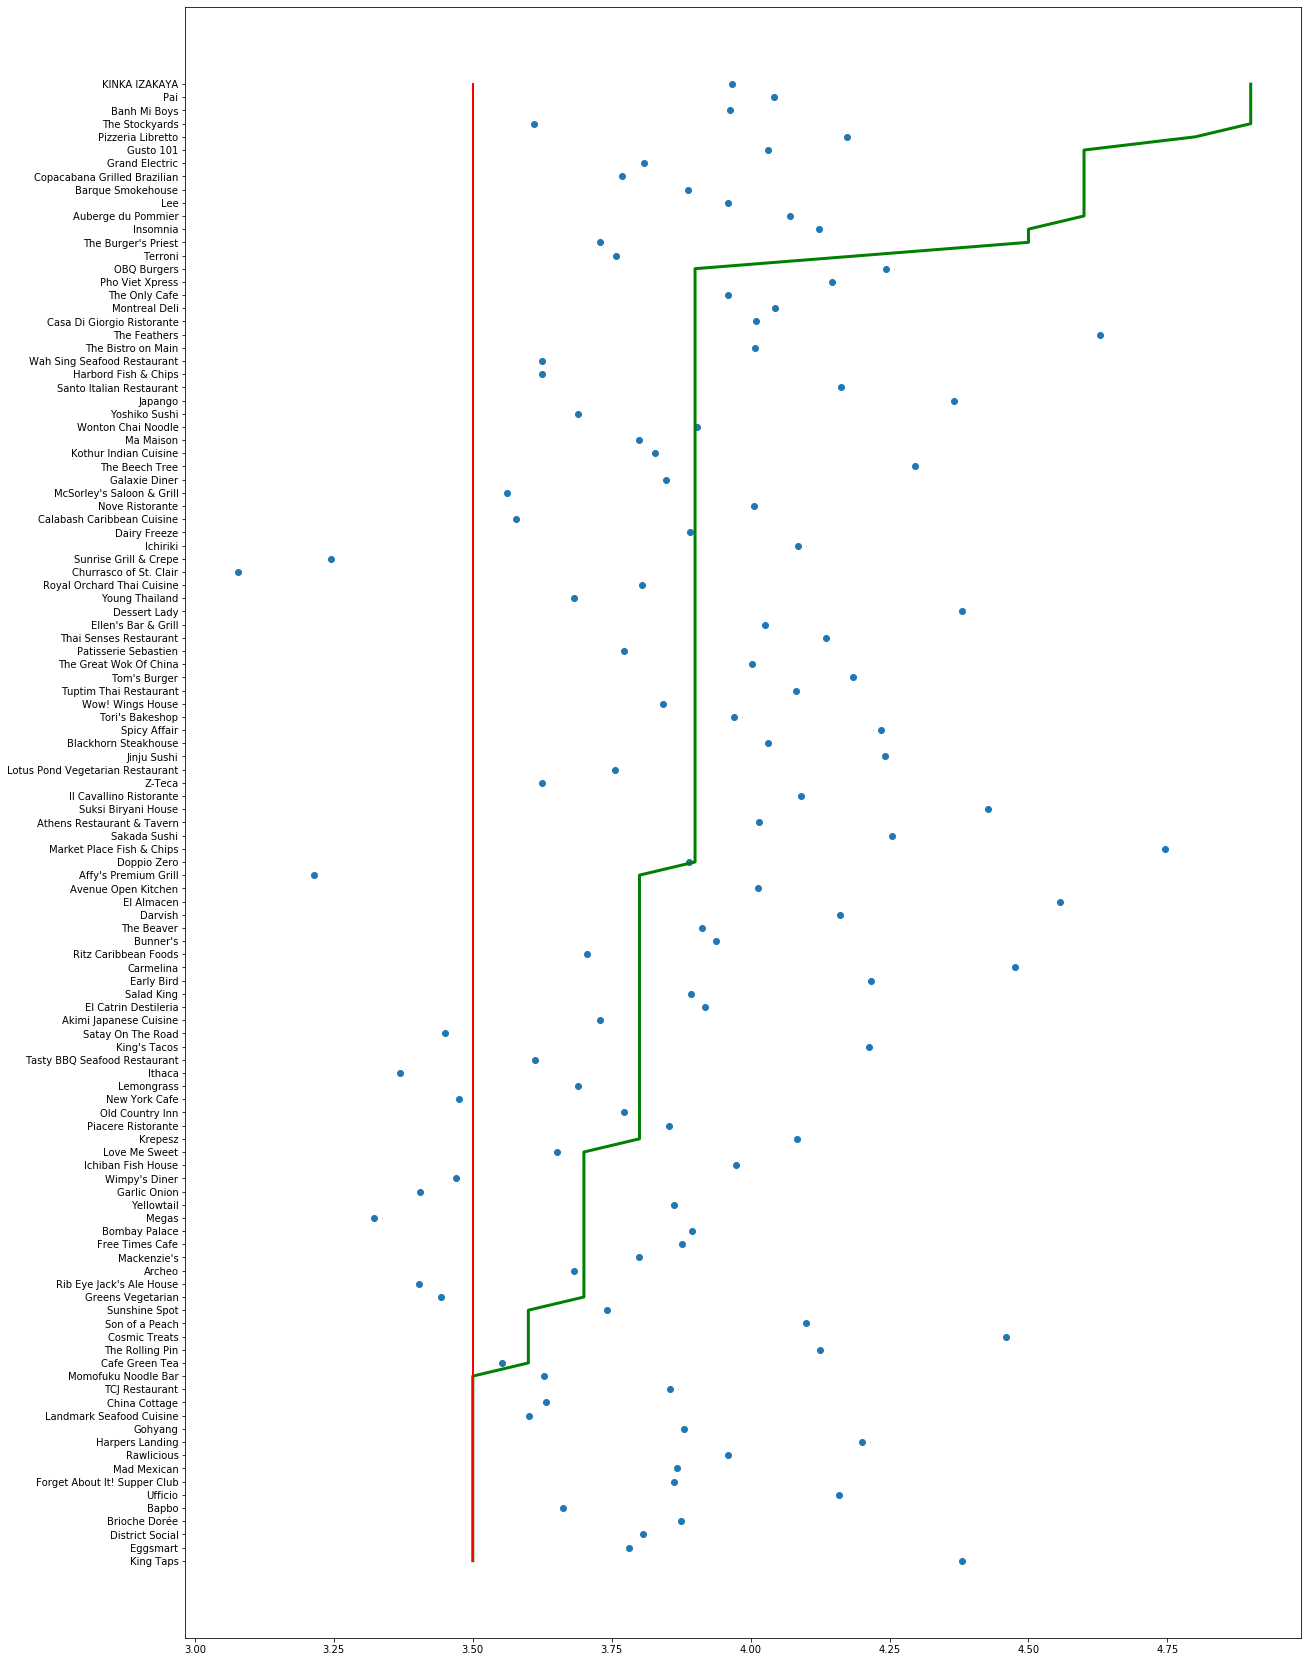

In [109]:
#scale scores to get in same range as overall rating
plt.figure(figsize=(20,30))
plt.plot(x,n, color='green', linewidth = '3')
plt.plot([3.5]*113,n, color='red', linewidth = '2')
plt.scatter(y*5 + 3,n)
plt.show()

note: Other analysis presented in the deck was done on Power BI

In [110]:
#finding inconsistencies betwween Zomato Ratings and Sentiment Scores

##### Some restaurants have poor Zomato Rating but their Sentiment Score is moderate

In [111]:
merged_df_sorted[(merged_df_sorted['overall_rating'] < 4) & (merged_df_sorted['Score'] > 0.1 )].head(10)

,Name,Location,overall_rating,Num_Reviews,Cuisines,Score,rest_id
96,King Taps,Financial District,3.5,20,"Casual Dining, Canadian",0.275944,96
49,Eggsmart,Discovery District,3.5,44,"Casual Dining, Diner",0.156265,49
52,District Social,Dufferin Grove,3.5,38,"Casual Dining, Middle Eastern, Mediterranean",0.161311,52
61,Brioche Dorée,Fashion District,3.5,38,"Café, Bakery, Bakery, Cafe",0.175049,61
62,Bapbo,Discovery District,3.5,31,"Casual Dining, Korean, Japanese",0.132324,62
73,Ufficio,Dufferin Grove,3.5,16,"Casual Dining, Mediterranean",0.231935,73
83,Forget About It! Supper Club,Entertainment District,3.5,40,"Casual Dining, Italian",0.172308,83
19,Mad Mexican,Runnymede,3.5,44,"Casual Dining, Mexican",0.173358,19
46,Rawlicious,Markham,3.5,36,"Café, Healthy Food, Cafe, Vegetarian",0.191912,46
18,Harpers Landing,Oakville,3.5,40,"Casual Dining, Canadian, Grill",0.240088,18


##### Some restaurants have Very High Zomato Rating but their Sentiment Score is below average

In [112]:
average_score = mean(merged_df_sorted['Score'])
average_score

0.1803056319868494

In [113]:
merged_df_sorted[(merged_df_sorted['overall_rating'] >= 4) & (merged_df_sorted['Score'] < average_score )].head(10)

,Name,Location,overall_rating,Num_Reviews,Cuisines,Score,rest_id
126,Terroni,Trinity Bellwoods,4.2,941,"Casual Dining, Italian, Pizza",0.151411,126
134,The Burger's Priest,The Beaches,4.5,772,"Quick Bites, Burger",0.145665,134
140,Barque Smokehouse,Roncesvalles Village,4.6,645,"Casual Dining, BBQ, Grill",0.177351,140
143,Copacabana Grilled Brazilian,Davisville Village,4.6,532,"Casual Dining, Brazilian, Grill",0.153800,143
136,Grand Electric,Brockton Village,4.6,719,"Casual Dining, Bar, Mexican",0.161687,136
137,The Stockyards,Forest Hill,4.9,727,"Quick Bites, BBQ, Burger",0.121914,137


#### Generating Wordclouds for negative comments

In [114]:
## from our data we observe that the comments with an average score of 0.1 and under are negative comments
# we will call this a cut_off for negative comments

In [115]:
cut_off = 0.1

In [42]:
#### Get wordcloud for each comment below the restaurants and another wordcloud for above
     # this will tell us what to focus on for negative comments

In [116]:
negative_comments = df_rest[df_rest['Score'] <= 0.1 ]['Comment']

In [117]:
#extract nounts and adjectives from negative comments

In [118]:
neg_nouns = []
neg_adject = []

try:
    for comms in negative_comments:
        blob = TextBlob(comms)
        #blob = blob.correct()
        word_tags = blob.tags

        for word, tag in word_tags:
            if(tag == 'NN'):
                neg_nouns.append(word)
            elif(tag == 'JJ'):
                neg_adject.append(word)
except:
    print('error in: ', comms)

error in:  nan


In [119]:
#### Create wordclouds for negative comments - nouns

In [120]:
        ###too may words for worcloud to process in short time so lets take only most common ones

In [139]:
neg_noun_df = pd.DataFrame(neg_nouns, columns = ['Nouns'])
top_neg_nouns = neg_noun_df['Nouns'].value_counts().head(14)

In [140]:
top_neg_nouns.index

Index(['food', 'restaurant', 'place', 'service', 'chicken', 'time', 'menu',
       'order', 'table', 'staff', 'dish', 'dinner', 'rice', '%'],
      dtype='object')

In [141]:
##remove irrelevant words in top 15 and create df again
neg_nouns.remove('i')
neg_nouns.remove("i")
neg_nouns.remove("%")

In [142]:
##select unique items with top 14 counts

In [143]:
unique_nouns = list(top_neg_nouns.index) #because the nouns have got stored as an index while doing value_counts

In [144]:
## select rows from nouns with those nouns

In [145]:
all_neg_nouns = neg_noun_df[neg_noun_df['Nouns'].isin(unique_nouns)]

In [135]:
##convert the pandas series to a normal list

In [146]:
all_neg_nouns = all_neg_nouns['Nouns']

In [147]:
from wordcloud import WordCloud, STOPWORDS

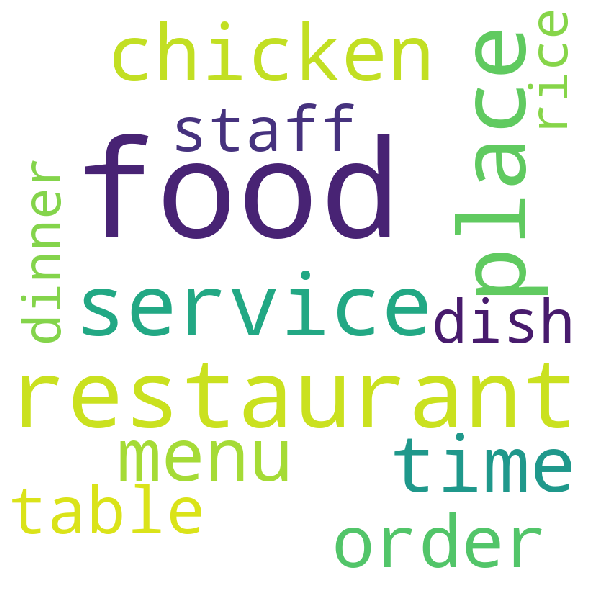

In [148]:
comment_words = ' '
stopwords = set(STOPWORDS) 
  
for val in all_neg_nouns: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
        wordcloud = WordCloud(width = 800, height = 800, 
        background_color ='white', 
        stopwords = stopwords,
        max_words = 14,
        min_font_size = 10).generate(comment_words) 
  
#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [149]:
#### Create wordclouds for negative comments - adjectives

In [150]:
neg_adj_df = pd.DataFrame(neg_adject, columns = ['Adjectives'])
top_neg_adj = neg_adj_df['Adjectives'].value_counts().head(25)

In [151]:
top_neg_adj = list(top_neg_adj.index)

In [152]:
top_neg_adj #after removing irrelevant ones such as good and great which could have been taken out of context

['good',
 'small',
 'last',
 'same',
 'much',
 'other',
 'bad',
 'great',
 'few',
 'many',
 'nice',
 'Indian',
 'first',
 'different',
 'poor',
 'full',
 'little',
 'dry',
 'big',
 'long',
 'open',
 'new',
 'delicious',
 'high',
 'sweet']

In [153]:
top_neg_adj_df = neg_adj_df[neg_adj_df['Adjectives'].isin(top_neg_adj)]

In [154]:
top_neg_adjectives = list(top_neg_adj_df['Adjectives'])

In [ ]:
comment_words = ' '
stopwords = set(STOPWORDS) 
  
for val in top_neg_adjectives: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
        wordcloud = WordCloud(width = 800, height = 800, 
        background_color ='white', 
        stopwords = stopwords,
        max_words = 10,
        min_font_size = 10).generate(comment_words) 
  
#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

---